In [1]:
from mom_trans.backtest import run_single_window 
import pandas as pd

In [2]:
from settings.fixed_params import MODLE_PARAMS as mp #model params lol
mp['batch_size'] = 64
mp['num_epochs'] = 10
mp['total_time_steps'] = 64

In [ ]:
df = pd.read_csv('msft_preprocessed.csv')
df['Time'] = pd.to_datetime(df['Time'])
dff = pd.DataFrame(df.groupby([pd.Grouper(key='Time', freq='1Min')]).sum()).reset_index()
ticker = df.iloc[:len(dff),3]
dff['ticker'] = ticker
df1 = pd.read_csv('jpm_preprocessed.csv')
df1['Time'] = pd.to_datetime(df1['Time'])
dff1 = pd.DataFrame(df1.groupby([pd.Grouper(key='Time', freq='1Min')]).sum()).reset_index()
ticker1 = df1.iloc[:len(dff1),3]
dff1['ticker'] = ticker1
df2 = pd.read_csv('aapl_preprocessed.csv')
df2['Time'] = pd.to_datetime(df2['Time'])
dff2 = pd.DataFrame(df2.groupby([pd.Grouper(key='Time', freq='1Min')]).sum()).reset_index()
ticker2 = df2.iloc[:len(dff2),3]
dff2['ticker'] = ticker2
df3 = pd.read_csv('amzn_preprocessed.csv')
df3['Time'] = pd.to_datetime(df3['Time'])
dff3 = pd.DataFrame(df3.groupby([pd.Grouper(key='Time', freq='1Min')]).sum()).reset_index()
ticker3 = df3.iloc[:len(dff3),3]
dff3['ticker'] = ticker3
df4 = pd.read_csv('goog_preprocessed.csv')
df4['Time'] = pd.to_datetime(df4['Time'])
dff4 = pd.DataFrame(df4.groupby([pd.Grouper(key='Time', freq='1Min')]).sum()).reset_index()
ticker4 = df4.iloc[:len(dff4),3]
dff4['ticker'] = ticker4
cd = pd.concat([dff,dff1,dff2,dff3,dff4])
cd1 = cd.sort_values(by='Time', ascending=True)
cd1['Time'] = cd1['Time'].astype(object)
print(cd.dtypes)
cd1.to_csv("jpm_msft_minute.csv",index=False)
#print(cd.head())

In [5]:
df = pd.read_csv('jpm_msft.csv')
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Trade_Volume',axis=1)
print(df.head())
df = df.sort_values(by='Time', ascending=True)
df.to_csv("jpm_msft_sorted.csv",index=False)


                        Time  Trade_Price ticker  Log_Return  log_1min  \
0 2020-01-09 09:30:00.289776       161.85   MSFT         0.0       0.0   
1 2020-01-09 09:30:00.289783       161.85   MSFT         0.0       0.0   
2 2020-01-09 09:30:00.289788       161.85   MSFT         0.0       0.0   
3 2020-01-09 09:30:00.289791       161.85   MSFT         0.0       0.0   
4 2020-01-09 09:30:00.289798       161.85   MSFT         0.0       0.0   

   volatility_log_1min  log_10min  volatility_log_10min  log_30min  \
0                  NaN        0.0                   NaN        0.0   
1                  NaN        0.0                   NaN        0.0   
2                  NaN        0.0                   NaN        0.0   
3                  NaN        0.0                   NaN        0.0   
4                  0.0        0.0                   0.0        0.0   

   volatility_log_30min  log_1h  volatility_log_1h  log_3h  volatility_log_3h  
0                   NaN     0.0                NaN    

In [3]:
features,model = run_single_window(experiment_name='test2',
                                   features_file_path='jpm_msft_sorted.csv',
                                   changepoint_lbws=False,
                                   train_interval= ('2020-01-09 09:30:00','2020-01-28 09:30:00','2020-01-29 16:30:00'), params = mp)

here


/Users/nanditakumari/Desktop/Finance_project/project_11_20/mom_trans/model_inputs.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["static_ticker"] = df["ticker"]


made it
Deep Momentum Network params:
architecture = TFT
total_time_steps = 64
early_stopping_patience = 25
multiprocessing_workers = 32
num_epochs = 10
fill_blank_dates = False
split_tickers_individually = True
random_search_iterations = 50
evaluate_diversified_val_sharpe = True
train_valid_ratio = 0.9
time_features = False
force_output_sharpe_length = 0
batch_size = 64
input_size = 10
output_size = 1
category_counts = [5]
static_input_loc = [9]
known_regular_inputs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
known_categorical_inputs = [0]
column_definition = [('ticker', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('Time', <DataTypes.DATE: 2>, <InputTypes.TIME: 5>), ('log_10min', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('log_30min', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('log_1h', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('log_3h', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('volatility_log_1min', <DataTypes.REAL_VALUED: 0>,

/Users/nanditakumari/miniconda3/envs/finML/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [4]:
result= model.fit(features.train,features.valid,mp,'abc')

Epoch 1/10
1687/1687 [==============================] - 109s 57ms/step - loss: -4.5100

val_sharpe 4.412642738863248
yup here
Epoch 2/10
1687/1687 [==============================] - 93s 55ms/step - loss: -5.0483

val_sharpe 4.4508455584822935
yup here
Epoch 3/10
1687/1687 [==============================] - 95s 56ms/step - loss: -5.1203

val_sharpe 4.477594216993593
yup here
Epoch 4/10
1687/1687 [==============================] - 97s 58ms/step - loss: -5.1808

val_sharpe 4.232189742639618
yup here
Epoch 5/10
1687/1687 [==============================] - 93s 55ms/step - loss: -5.2380

val_sharpe 4.616133525850365
yup here
Epoch 6/10
1687/1687 [==============================] - 94s 56ms/step - loss: -5.2619

val_sharpe 4.617834727149883
yup here
Epoch 7/10
1687/1687 [==============================] - 95s 56ms/step - loss: -5.4921

val_sharpe 4.686302156873862
yup here
Epoch 8/10
1687/1687 [==============================] - 96s 57ms/step - loss: -5.6409

val_sharpe 4.270919074479522
yup her

In [5]:
print(mp)
loc = model.get_positions(features.train,result)
loc1 = model.get_positions(features.test_fixed,result)
loc2 = model.get_positions(features.valid,result)
print(loc[1])
print(loc1[1])
print(loc2[1])

{'architecture': 'TFT', 'total_time_steps': 64, 'early_stopping_patience': 25, 'multiprocessing_workers': 32, 'num_epochs': 10, 'fill_blank_dates': False, 'split_tickers_individually': True, 'random_search_iterations': 50, 'evaluate_diversified_val_sharpe': True, 'train_valid_ratio': 0.9, 'time_features': False, 'force_output_sharpe_length': 0, 'batch_size': 64, 'hidden_layer_size': 10, 'dropout_rate': 0.1, 'max_gradient_norm': 0.01, 'learning_rate': 0.0001}
6.125127521748281
4.664828924548874
5.501448440203719


In [6]:
import numpy as np
loc[0].to_csv("msft_aapl_amzn_jpm_goog_train_output_dr1_ls10_lr4.csv",index=False)
loc1[0].to_csv("msft_aapl_amzn_jpm_goog_test_output_dr1_ls10_lr4.csv",index=False)
loc2[0].to_csv("msft_aapl_amzn_jpm_goog_valid_output_dr1_ls10_lr4.csv",index=False)
test=loc[0]
test1=loc1[0]
test2=loc2[0]
#print(test)
np.corrcoef(test.returns,test.position)

array([[1.        , 0.30957304],
       [0.30957304, 1.        ]])

In [7]:
np.corrcoef(test1.returns,test1.position)

array([[1.        , 0.24960197],
       [0.24960197, 1.        ]])

In [8]:
np.corrcoef(test2.returns,test2.position)

array([[1.        , 0.31173434],
       [0.31173434, 1.        ]])

In [51]:
import matplotlib.pyplot as plt
#plt.plot(test1.captured_returns.cumsum())

In [10]:
def get_time_sharpe(df):
    sharpe= df.captured_returns.expanding().mean()/df.captured_returns.expanding().std()
    return sharpe

In [39]:
fdf = pd.read_csv("msft_aapl_amzn_jpm_goog_test_output_dr1_ls10_lr4.csv")
print(fdf)
fdf['time'] = pd.to_datetime(fdf['time'])
fdf = fdf.sort_values(by='time', ascending=True)
sh = get_time_sharpe(fdf)


      identifier                        time   returns  position  \
0           AAPL  2020-01-28 09:30:01.028522  0.000224  0.491285   
1           AAPL  2020-01-28 09:30:01.269578  0.000320  0.586222   
2           AAPL  2020-01-28 09:30:01.635995  0.000384  0.666618   
3           AAPL  2020-01-28 09:30:01.811126  0.000512  0.757815   
4           AAPL  2020-01-28 09:30:01.903067  0.000608  0.822547   
...          ...                         ...       ...       ...   
23632       MSFT  2020-01-29 16:29:19.373488  0.001517  0.066981   
23633       MSFT  2020-01-29 16:29:27.834014  0.001750  0.115932   
23634       MSFT  2020-01-29 16:29:46.338190  0.001050  0.194550   
23635       MSFT  2020-01-29 16:29:53.610144  0.000467  0.060689   
23636        NaN  2020-01-29 16:29:59.717882  0.000000  0.065713   

       captured_returns  
0              0.000110  
1              0.000188  
2              0.000256  
3              0.000388  
4              0.000500  
...                 ...  
2

Text(0.5, 0, 'Time')

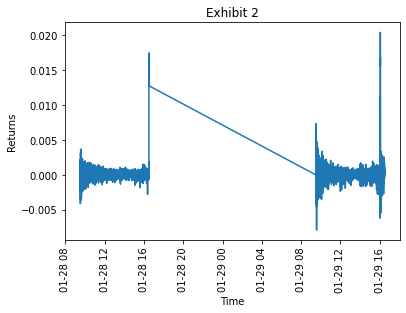

In [44]:
import matplotlib.pyplot as plt
#plt.plot(fdf.time,sh*np.sqrt(252))#
plt.plot(fdf.time,fdf.returns)#
plt.title("Exhibit 2")
plt.ylabel("Returns")
plt.xticks(rotation=90)
plt.xlabel("Time")

Text(0.5, 0, 'Time')

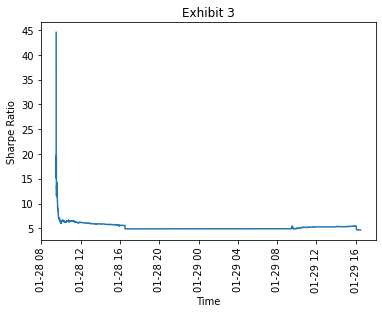

In [49]:
plt.plot(fdf.time,sh*np.sqrt(252))#
#plt.plot(fdf.time,fdf.returns)#
plt.title("Exhibit 3")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=90)
plt.xlabel("Time")
#plt.ylim(-1,15)
#plt.xlim(pd.to_datetime('2020-01-22 09:29:00'),pd.to_datetime('2020-01-28 16:29:00'))

Text(0.5, 0, 'Time')

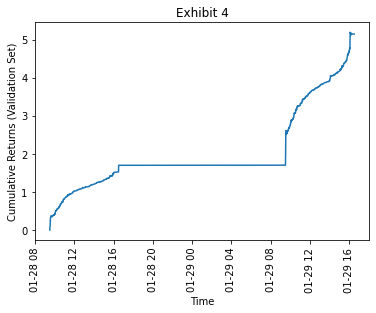

In [50]:
cr = fdf.captured_returns.cumsum()
plt.plot(fdf.time,cr)
plt.xticks(rotation=90)
plt.title("Exhibit 4")
plt.ylabel("Cumulative Returns (Validation Set)")
plt.xticks(rotation=90)
plt.xlabel("Time")